--2020-09-19 22:39:53--  https://data.cdc.gov/api/views/9bhg-hcku/rows.csv?accessType=DOWNLOAD
Resolving data.cdc.gov (data.cdc.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cdc.gov (data.cdc.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD.1’

rows.csv?accessType     [ <=>                ] 357.34K  --.-KB/s    in 0.04s   

2020-09-19 22:39:53 (9.61 MB/s) - ‘rows.csv?accessType=DOWNLOAD.1’ saved [365914]

--2020-09-19 22:39:53--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21917738 (21M) [text/plain]
Saving to: ‘us-counties.csv.1’

us-counties.csv.1  

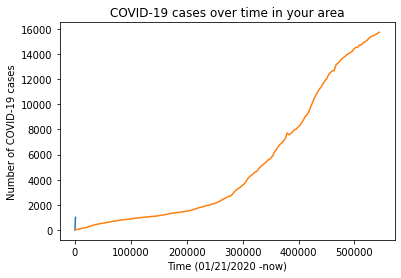

In [ ]:
#import stuff
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix


#read csv
!wget https://data.cdc.gov/api/views/9bhg-hcku/rows.csv?accessType=DOWNLOAD
!wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
df = pd.read_csv('rows.csv?accessType=DOWNLOAD')
countydf = pd.read_csv('us-counties.csv')
#ask for user input
print("Welcome to the CoVID-19 stat tracker. To begin we just need to ask you a few questions. Disclaimer: All of our data is from the CDC and the NY Times")
state = input("Enter the state you want to find out about: ")
while True:
  try:
    age = int(input("Enter your age: "))
    break
  except:
    print("Enter a Number")
    continue

gender = input("Enter your gender: ")
county = input("Enter your county: ")
gender = gender.capitalize()

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


#find age group in terms of data frame
def findAge(age):
  if age <= 1:
    return 'Under 1 year'
  elif age<= 4:
    return '1-4 years'
  elif age<= 14:
    return '5-14 years'
  elif age<= 24:
    return '15-24 years'
  elif age<= 34:
    return '25-34 years'
  elif age<= 44:
    return '35-44 years'
  elif age<= 54:
    return '45-54 years'
  elif age<= 64:
    return '55-64 years'
  elif age<= 74:
    return '65-74 years'
  elif age<= 84:
    return '75-84 years'
  else:
    return '85 years and over'
#parse the data frame for the person
def findData(state, gender, age):
  df2 = df[df['State'] == state]
  df3 = df2[df2['Sex'] == gender]
  df4 = df3[df3['Age group'] == age]
  return df4
def findCountyGraph(state, county):
  df5 = countydf[countydf['state']== state]
  df6 = df5[df5['county']==county]
  plt.plot(range(1000))
  plt.xlabel('Time (01/21/2020 -now)')
  plt.ylabel('Number of COVID-19 cases')
  plt.title('COVID-19 cases over time in your area')
  graph = plt.plot(df6['cases'])
  return graph
def findCountyData(state, county):
  cdf2 = countydf[countydf['state'] == state]
  cdf3 = cdf2[cdf2['county'] == county]
  cdf4 = cdf3['cases']
  cdf5 = cdf4.values
  final = cdf5[-1]
  return final
personAge = findAge(age)
finalFrame = findData(state, gender, personAge)
perOfCovidDeaths = finalFrame[['COVID-19 Deaths']]
perc = perOfCovidDeaths.values
totalDeaths = finalFrame[['Total Deaths']]
total = totalDeaths.values
percentage = perc[0,0]
Deaths = total[0,0]
numberOfCases = findCountyData(state, county)
finalStat = (percentage/Deaths) * 100
print(color.BOLD + "\n\n\n\nOut of a total of", str(Deaths),"deaths in",state,"of people your age and gender,\nthe death rate to COVID-19 is",str(finalStat) + color.END)
print(color.BOLD + "\n\n\nToday the total number of cases in your county was a total of", str(numberOfCases)+"."+color.END)
print("\n \n \n")
findCountyGraph(state, county)
print(color.BOLD + "This is a graph of the trend of COVID-19 cases in your county starting from 01/21/2020 till 09/14/2020. \nOf course rememeber to wash your hands, wear a mask, and be safe")
